# Neural Network Regression to Locate and Size Damage in Skin

*Ian Viotti, 2022*

---

In [1]:
from aux_fun import plot_damage

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn import preprocessing

import seaborn as sns

sns.set_theme()
plt.rcParams["image.cmap"] = "Set2"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set2.colors)
matplotlib.rcParams.update({'font.size': 22})

# Data Aquisition

In [2]:
skin_df = pd.read_csv('skin_damage_data.csv')

# Data Pre-Processing

In [3]:
skin_df = skin_df.drop(['Unnamed: 0', '5', '6', '7', '8', '9', 'Type'], axis = 1)

In [146]:
cols = ['pos x','pos y','theta','c','r', '0', '1', '2', '3','4', 'UZ - N1 M1','UZ - N1 M2','UZ - N1 M3','UZ - N1 M4', 'UZ - N2 M1','UZ - N2 M2','UZ - N2 M3','UZ - N2 M4','UZ - N3 M1','UZ - N3 M2','UZ - N3 M3','UZ - N3 M4','UZ - N4 M1','UZ - N4 M2','UZ - N4 M3','UZ - N4 M4']

In [206]:
skin_df = skin_df[cols]
skin_df

,pos x,pos y,theta,c,r,0,1,2,3,4,...,UZ - N2 M3,UZ - N2 M4,UZ - N3 M1,UZ - N3 M2,UZ - N3 M3,UZ - N3 M4,UZ - N4 M1,UZ - N4 M2,UZ - N4 M3,UZ - N4 M4
0,0.090944,0.042684,152.060777,0.037005,0.756625,209.86,351.03,836.06,1044.9,1180.1,...,4.104866,1.425616,1.351220,1.848271,-3.457802,3.620742,1.353018,-1.759168,-3.440266,-3.465347
1,0.076442,0.081563,171.561979,0.062878,0.281153,210.07,350.82,834.98,1044.7,1179.3,...,4.101315,1.438394,1.348755,1.845597,-3.468009,3.616461,1.352338,-1.757494,-3.432863,-3.473756
2,0.110037,0.096874,39.573327,0.033129,0.398101,210.25,351.16,835.75,1044.9,1179.7,...,4.108557,-1.423063,1.351263,1.847043,-3.455521,-3.623022,1.353532,-1.757161,-3.441340,3.464921
3,0.110882,0.091624,178.040952,0.052017,0.992999,209.88,349.97,832.98,1043.8,1175.6,...,4.118677,-1.405552,1.347624,1.843480,-3.445210,-3.634970,1.348853,-1.751966,-3.451075,3.461317
4,0.102059,0.142322,49.129789,0.035738,0.892404,210.28,351.01,835.82,1043.8,1177.7,...,4.116583,1.429297,1.351486,1.845234,-3.455913,3.621955,1.353932,-1.755497,-3.439644,-3.465690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.090655,0.100069,99.768429,0.033051,0.378840,210.26,351.18,835.88,1044.8,1179.8,...,4.107201,1.426926,1.351271,1.847004,-3.457397,3.621210,1.353816,-1.757305,-3.439590,-3.466436
996,0.069710,0.149285,81.602558,0.073562,0.385164,210.27,350.70,835.46,1042.3,1174.3,...,4.112071,-1.472011,1.351238,1.841866,-3.459564,-3.615818,1.353825,-1.753775,-3.433442,3.469902
997,0.111659,0.053018,126.715445,0.052795,0.695333,209.57,350.54,835.33,1044.8,1179.2,...,4.103376,-1.422871,1.348010,1.850075,-3.454831,-3.623222,1.352263,-1.758320,-3.444000,3.463094
998,0.111873,0.139951,124.964620,0.051113,0.670800,210.26,350.83,835.57,1043.2,1176.5,...,4.123812,1.418942,1.351297,1.844164,-3.453277,3.624623,1.353691,-1.753953,-3.441196,-3.463661


In [148]:
X_raw = skin_df.values[:,5:]
y_raw = skin_df.values[:,:5]

std_x = preprocessing.StandardScaler().fit(X_raw)
std_y = preprocessing.StandardScaler().fit(y_raw)

X = std_x.transform(X_raw)
y = std_y.transform(y_raw)

# Model Training

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=1,
                                                    test_size = 0.3)

MLPR = MLPRegressor(random_state=1,
                     #hidden_layer_sizes = (50,30),
                     solver = 'adam',
                     activation = 'tanh',
                     learning_rate = 'constant',
                     alpha = 0.1,
                     validation_fraction = 0.1,
                     max_iter=1000,
                     warm_start = True,
                    )

regr = MLPR.fit(X_train, y_train)

In [150]:
regr.score(X_test, y_test)

0.572042857667755

## Model Tuning

In [151]:
param_grid = {
    'hidden_layer_sizes': [(75,60),(75,50),(75,40),(70,50),(65,50),(60,50), (60,60), (60,40)],
    'max_iter': [500, 800],
    'activation': ['tanh'],
    'alpha': [0.4, 0.5, 0.6],
}

In [10]:
grid = GridSearchCV(MLPR, param_grid, n_jobs= 6, cv=5)
#grid.fit(X_train, y_train)

In [11]:
grid.best_score_, grid.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [152]:
tuned_MLPR = MLPRegressor(random_state=1,
                     activation = 'tanh',
                     alpha = 0.6,
                     hidden_layer_sizes = (60, 50),
                     learning_rate = 'constant',
                     max_iter = 10000,
                     solver = 'adam'
                    )

tuned_fit = tuned_MLPR.fit(X_train, y_train)

In [153]:
tuned_fit

MLPRegressor(activation='tanh', alpha=0.6, hidden_layer_sizes=(60, 50),
             max_iter=10000, random_state=1)

## Validação experimental

In [154]:
# {x, y, theta, c, r}

ycdp1 = [0.127, 0.127, 38.7, 7/100, 3/7]
ycdp2 = [0.110, 0.085, 51.3, 5/100, 1.5/5]
ycdp3 = [0.035, 0.150, 0.00, 3/100, 3/3]
ycdp4 = [0.075, 0.085, 84.0, 7/100, 3/7]
ycdp5 = [0.055, 0.055, 180-35.5, 4.7/100, 1.5/4.7]

ycdp = [ycdp1, ycdp2, ycdp3, ycdp4, ycdp5]

In [231]:
# X = {wn1, wn2, wn3, wn4, wn5, 'N1 M1',' N1 M2',' N1 M3',' N1 M4', ' N2 M1',' N2 M2',' N2 M3',' N2 M4',' N3 M3',' N4 M3',' N2 M2',' N3 M2',' N4 M2',' N2 M1',' N3 M1',' N4 M1'}

n = np.linspace(0.1, 100, 10000)
l = []

for i in n:

    cdp1w = [241, 476, 1181, 1702, 2318]
    cdp1m = np.array([0.195891991, -0.002693255,-0.033168353,-0.022882916, 0.184504062,-0.005673673,-0.033136699,-0.021735031,0.055329718,-0.003587545,0.026748158,-0.004500594, 0.061699059,-0.002244467,0.025592869,-0.000369769])
    cdp1 = np.hstack((cdp1w,cdp1m*i))

    cdp2w = [246, 478, 1167, 1194, 2328]
    cdp2m = np.array([0.153017849,-0.007990695,-0.03233204,-0.02116631,0.172754526,-0.006023388,-0.037245434,-0.019475631, 0.059175465,-0.000497486,0.028370203,-0.001188551, 0.059175465,-0.000497486,0.028370203,-0.001188551])
    cdp2 = np.hstack((cdp2w,cdp2m*i))
    
    cdp3w = [237, 479, 1148, 1656, 2297]
    cdp3m = np.array([0.18516016,-0.003742712,-0.035211541,0.010455761, 0.172290131,-0.007895392,-0.029699165,0.007584221, 0.053937923,0.001243974,0.028137742,0.006486917, 0.064305864,-0.006930701,0.031394221,0.007400653])
    cdp3 = np.hstack((cdp3w,cdp3m*i))
    
    cdp4w = [236, 469, 1160, 1695, 2294]
    cdp4m = np.array([0.21304661,0.004370966,-0.031691,-0.015571769, 0.229060054,-0.017797079,-0.029577555,-0.023406971, 0.084554657,0.00632232,0.025675608,-0.006875959, 0.065138966,-0.007343254,0.021899858,0.000769154])
    cdp4 = np.hstack((cdp4w,cdp4m*i))
    
    cdp5w = [246, 279, 1160, 1685, 2317]
    cdp5m = np.array([0.179065466,0.003832174,-0.032111522,-0.010527926, 0.058009207,-0.003449094,-0.034407601,-0.023239803, 0.022611091,-0.004697795,0.025946364,-0.005573578, 0.019746052,0.000309842,0.022495726,0.002306913])
    cdp5 = np.hstack((cdp5w,cdp5m*i))


    exp_data = np.array([cdp1, cdp2, cdp3, cdp4, cdp5])

    exp_df = pd.DataFrame(exp_data)

    X_std = std_x.transform(exp_df)
    y_exp = std_y.inverse_transform(tuned_fit.predict(X_std))

    RMSE = sum(sum(np.sqrt((std_y.transform(ycdp) - std_y.transform(y_exp))**2)))
    
    l.append(RMSE)
    
    if i == 56.049594959495955: break

In [195]:
n[np.argmin(l)]

0.5795679567956796

In [230]:
n[5600]

56.049594959495955

In [211]:
l[5800]

44.034016609847384

In [210]:
np.argmin(l)

48

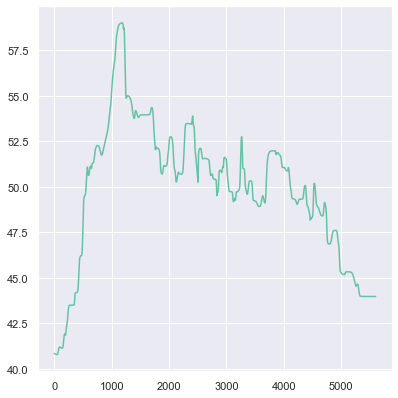

In [232]:
plt.plot(l)

In [218]:
exp_df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,241.0,476.0,1181.0,1702.0,2318.0,11.175382,-0.153647,-1.892211,-1.305440,10.525716,...,-1.890405,-1.239955,3.156488,-0.204665,1.525948,-0.256753,3.519851,-0.128044,1.460040,-0.021095
1,246.0,478.0,1167.0,1194.0,2328.0,8.729469,-0.455859,-1.844501,-1.207510,9.855420,...,-2.124803,-1.111059,3.375883,-0.028381,1.618483,-0.067805,3.375883,-0.028381,1.618483,-0.067805
2,237.0,479.0,1148.0,1656.0,2297.0,10.563145,-0.213517,-2.008772,0.596488,9.828927,...,-1.694299,0.432670,3.077088,0.070967,1.605221,0.370070,3.668566,-0.395387,1.790999,0.422198
3,236.0,469.0,1160.0,1695.0,2294.0,12.154031,0.249358,-1.807930,-0.888349,13.067577,...,-1.687361,-1.335337,4.823733,0.360680,1.464760,-0.392264,3.716093,-0.418923,1.249358,0.043879
4,246.0,279.0,1160.0,1685.0,2317.0,10.215451,0.218621,-1.831920,-0.600604,3.309350,...,-1.962909,-1.325800,1.289933,-0.268003,1.480206,-0.317965,1.126486,0.017676,1.283352,0.131606


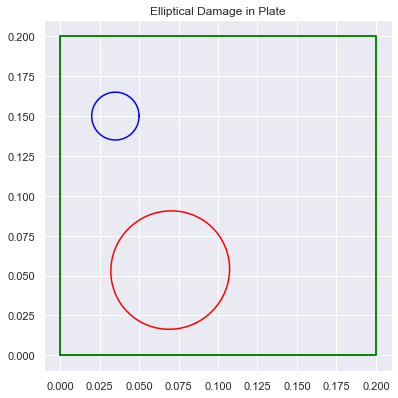

In [244]:
j = 2
#for i in range(len(y_exp)):
plot_damage(y_exp[j], color = 'red')
#for i in range(len(y_exp)):
plot_damage(ycdp[j], color = 'blue')

In [ ]:
sum(np.sqrt((ycdp - y_exp)**2))

array([1.80707189e-01, 1.48321756e-01, 3.12368228e+02, 3.75117466e-01,
       1.90952771e+00])

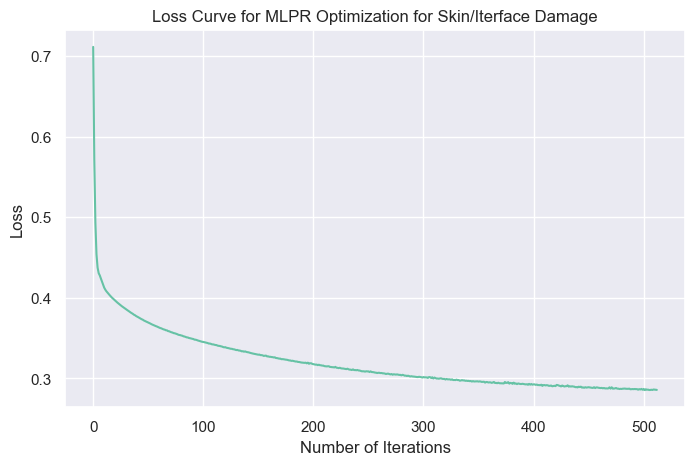

In [15]:
fig, ax = plt.subplots(figsize = (8,5), dpi=100)

ax.plot(tuned_fit.loss_curve_)
ax.set(title = 'Loss Curve for MLPR Optimization for Skin/Iterface Damage', xlabel = 'Number of Iterations', ylabel = 'Loss')
plt.show()

fig.savefig("images/MLPR_loss_curve.svg", dpi=300)

In [16]:
tuned_fit.score(X_test, y_test)

0.5805645495620861

# Post Processing

In [18]:
RNA1_MAE = metrics.mean_absolute_error(y_test, tuned_fit.predict(X_test))
RNA2_MAE = metrics.mean_absolute_error(y_test, regr.predict(X_test))

RNA1_MAE, RNA2_MAE

(0.44161318116536147, 0.451118991638167)

In [15]:
RNA1_MSE = metrics.mean_squared_error(y_test, tuned_fit.predict(X_test))
RNA2_MSE = metrics.mean_squared_error(y_test, regr.predict(X_test))

RNA1_MSE, RNA2_MSE

(0.43545459507308076, 0.4405828311829372)

In [14]:
RNA1_r2 = metrics.r2_score(y_test, tuned_fit.predict(X_test))
RNA2_r2 = metrics.r2_score(y_test, regr.predict(X_test))

RNA1_r2, RNA2_r2

(0.5805645495620861, 0.5755343643473243)

In [19]:
RNA1_MAPE = metrics.mean_absolute_percentage_error(y_test, tuned_fit.predict(X_test))
RNA2_MAPE = metrics.mean_absolute_percentage_error(y_test, regr.predict(X_test))

RNA1_MAPE, RNA2_MAPE

(1.5455215416529156, 1.5983954496311197)

In [18]:
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError
import statsmodels.stats.api as sms
from scipy import stats
from scipy.stats import norm, ks_2samp

In [12]:
tuned_MLPR = MLPRegressor(random_state=1,
                     activation = 'tanh',
                     alpha = 0.6,
                     hidden_layer_sizes = (60, 50),
                     learning_rate = 'constant',
                     max_iter = 1000,
                     solver = 'adam'
                    )
tuned_fit = tuned_MLPR.fit(X_train, y_train)

### Metric Plots

alpha

In [11]:
from yellowbrick.regressor import AlphaSelection, ManualAlphaSelection

In [16]:
alphas

array([1.00000000e-10, 1.29154967e-10, 1.66810054e-10, 2.15443469e-10,
       2.78255940e-10, 3.59381366e-10, 4.64158883e-10, 5.99484250e-10,
       7.74263683e-10, 1.00000000e-09, 1.29154967e-09, 1.66810054e-09,
       2.15443469e-09, 2.78255940e-09, 3.59381366e-09, 4.64158883e-09,
       5.99484250e-09, 7.74263683e-09, 1.00000000e-08, 1.29154967e-08,
       1.66810054e-08, 2.15443469e-08, 2.78255940e-08, 3.59381366e-08,
       4.64158883e-08, 5.99484250e-08, 7.74263683e-08, 1.00000000e-07,
       1.29154967e-07, 1.66810054e-07, 2.15443469e-07, 2.78255940e-07,
       3.59381366e-07, 4.64158883e-07, 5.99484250e-07, 7.74263683e-07,
       1.00000000e-06, 1.29154967e-06, 1.66810054e-06, 2.15443469e-06,
       2.78255940e-06, 3.59381366e-06, 4.64158883e-06, 5.99484250e-06,
       7.74263683e-06, 1.00000000e-05, 1.29154967e-05, 1.66810054e-05,
       2.15443469e-05, 2.78255940e-05, 3.59381366e-05, 4.64158883e-05,
       5.99484250e-05, 7.74263683e-05, 1.00000000e-04, 1.29154967e-04,
      

In [13]:
alphas = np.logspace(-10, 1, 100)

visualizer = ManualAlphaSelection(
    MLPRegressor(max_iter = 800),
    alphas=alphas,
    cv=10,
    scoring="neg_mean_squared_error"
)

C:\Users\Ian\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ian\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ian\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ian\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users

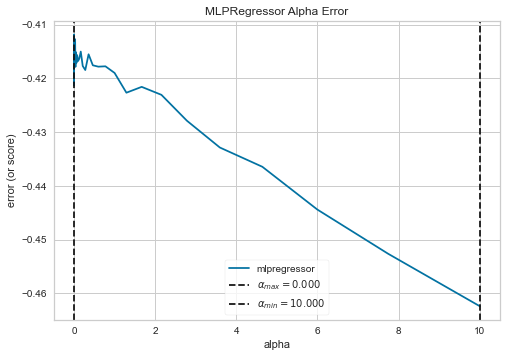

<AxesSubplot:title={'center':'MLPRegressor Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [14]:
visualizer.fit(X, y)

In [15]:
visualizer.show()

<AxesSubplot:title={'center':'MLPRegressor Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

X

<AxesSubplot:title={'center':'Residual Histogram for $x$ Parameter'}, ylabel='Frequency'>

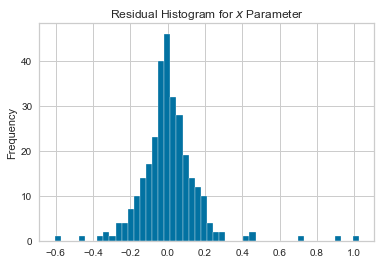

In [20]:
fig, ax = plt.subplots(figsize=(6, 4))
resids = y_test - tuned_fit.predict(X_test)
pd.Series(resids.T[0], name="residuals").plot.hist(bins=50, ax=ax, title="Residual Histogram for $x$ Parameter")

#fig.savefig("images/MLPR_residual_x.svg", dpi=300)

[Text(0.5, 1.0, 'Probability Plot for $x$ Parameter')]

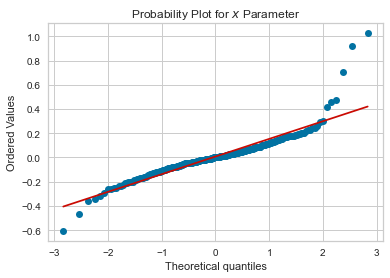

In [16]:
fig, ax = plt.subplots(figsize=(6, 4))
_ = stats.probplot(resids.T[0], plot=ax)

ax.set(title='Probability Plot for $x$ Parameter')

#fig.savefig("images/MLPR_probability_x.svg", dpi=300)

In [23]:
y = resids.T[0]
p = []
s = []
for i in range(50):
    x = stats.norm.rvs(size=len(y), scale = np.std(y))
    p.append(ks_2samp(x,y).pvalue)
    s.append(ks_2samp(x,y).statistic)
    
np.mean(s), np.mean(p)

(0.12119999999999999, 0.046179983207786005)

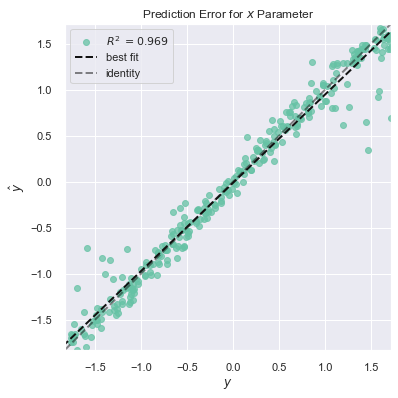

In [216]:
tuned_MLPR = MLPRegressor(random_state=1,
                     activation = 'tanh',
                     alpha = 0.6,
                     hidden_layer_sizes = (60, 50),
                     learning_rate = 'constant',
                     max_iter = 1000,
                     solver = 'adam'
                    )

fig, ax = plt.subplots(figsize=(6, 6))
pev = PredictionError(tuned_MLPR, title='Prediction Error for $x$ Parameter')
pev.fit(X_train, y_train.T[0])
pev.score(X_test, y_test.T[0])

pev.show()

fig.savefig("images/MLPR_prediction_x.svg", dpi=300)

Y

In [178]:
tuned_MLPR = MLPRegressor(random_state=1,
                     activation = 'tanh',
                     alpha = 0.6,
                     hidden_layer_sizes = (60, 50),
                     learning_rate = 'constant',
                     max_iter = 1000,
                     solver = 'adam'
                    )

<AxesSubplot:title={'center':'Residual Histogram for $y$ Parameter'}, ylabel='Frequency'>

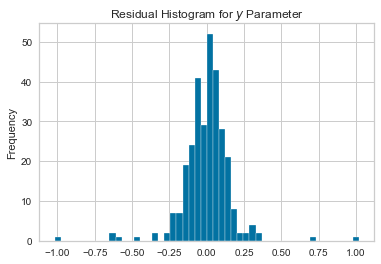

In [29]:
fig, ax = plt.subplots(figsize=(6, 4))
resids = y_test - tuned_fit.predict(X_test)
pd.Series(resids.T[1], name="residuals").plot.hist(bins=50, ax=ax, title="Residual Histogram for $y$ Parameter")

#fig.savefig("images/MLPR_residual_y.svg", dpi=300)

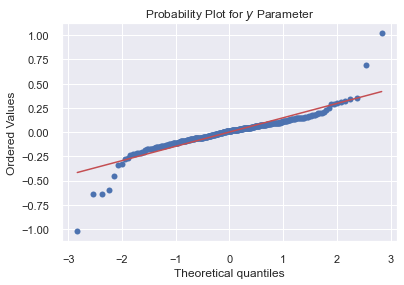

In [220]:
fig, ax = plt.subplots(figsize=(6, 4))
_ = stats.probplot(resids.T[1], plot=ax)

ax.set(title='Probability Plot for $y$ Parameter')

#fig.savefig("images/MLPR_probability_y.svg", dpi=300)

In [39]:
np.std(y)
np.std(x)

0.16845357796143287

In [37]:
y = resids.T[1]
p = []
s = []
for i in range(50):
    x = stats.norm.rvs(size=len(y), scale = np.std(y))
    p.append(ks_2samp(x,y).pvalue)
    s.append(ks_2samp(x,y).statistic)
    
np.mean(s), np.mean(p)

(0.12319999999999999, 0.03284610579025364)

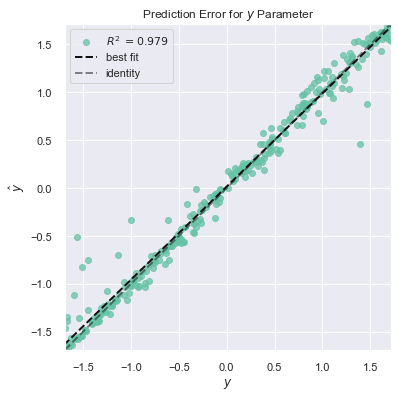

In [221]:
tuned_MLPR = MLPRegressor(random_state=1,
                     activation = 'tanh',
                     alpha = 0.6,
                     hidden_layer_sizes = (60, 50),
                     learning_rate = 'constant',
                     max_iter = 1000,
                     solver = 'adam'
                    )

fig, ax = plt.subplots(figsize=(6, 6))
pev = PredictionError(tuned_MLPR , title='Prediction Error for $y$ Parameter')
pev.fit(X_train, y_train.T[1])
pev.score(X_test, y_test.T[1])
pev.show()

fig.savefig("images/MLPR_prediction_y.svg", dpi=300)

theta

In [183]:
tuned_MLPR = MLPRegressor(random_state=1,
                     activation = 'tanh',
                     alpha = 0.6,
                     hidden_layer_sizes = (60, 50),
                     learning_rate = 'constant',
                     max_iter = 1000,
                     solver = 'adam'
                    )

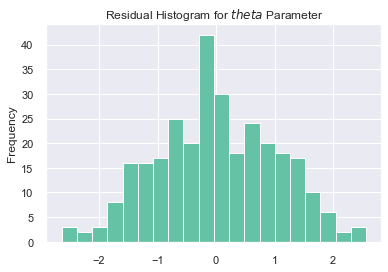

In [223]:
fig, ax = plt.subplots(figsize=(6, 4))
resids = y_test - tuned_fit.predict(X_test)
pd.Series(resids.T[2], name="residuals").plot.hist(bins=20, ax=ax, title="Residual Histogram for $theta$ Parameter")

fig.savefig("images/MLPR_residual_theta.svg", dpi=300)

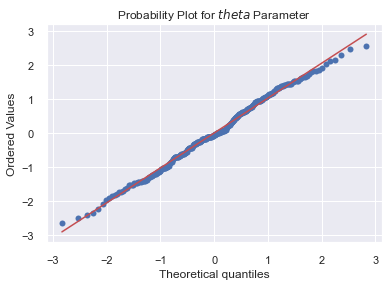

In [224]:
fig, ax = plt.subplots(figsize=(6, 4))
_ = stats.probplot(resids.T[2], plot=ax)

ax.set(title='Probability Plot for $theta$ Parameter')

fig.savefig("images/MLPR_probability_theta.svg", dpi=300)

In [30]:
y = resids.T[2]
p = []
s = []
for i in range(50):
    x = stats.norm.rvs(size=len(y), scale = np.std(y))
    p.append(ks_2samp(x,y).pvalue)
    s.append(ks_2samp(x,y).statistic)
    
np.mean(s), np.mean(p)

(0.0702, 0.4896293511669554)

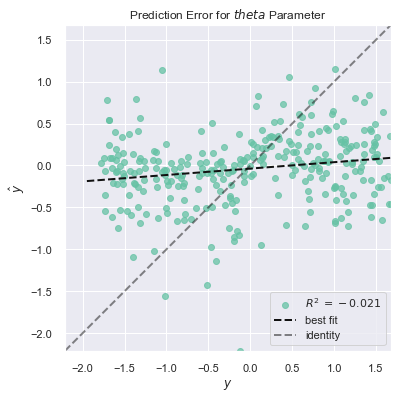

In [225]:
tuned_MLPR = MLPRegressor(random_state=1,
                     activation = 'tanh',
                     alpha = 0.6,
                     hidden_layer_sizes = (60, 50),
                     learning_rate = 'constant',
                     max_iter = 1000,
                     solver = 'adam'
                    )

fig, ax = plt.subplots(figsize=(6, 6))
pev = PredictionError(tuned_MLPR, title = 'Prediction Error for $theta$ Parameter')
pev.fit(X_train, y_train.T[2])
pev.score(X_test, y_test.T[2])
pev.show()

fig.savefig("images/MLPR_prediction_theta.svg", dpi=300)

C

In [188]:
tuned_MLPR = MLPRegressor(random_state=1,
                     activation = 'tanh',
                     alpha = 0.6,
                     hidden_layer_sizes = (60, 50),
                     learning_rate = 'constant',
                     max_iter = 1000,
                     solver = 'adam'
                    )

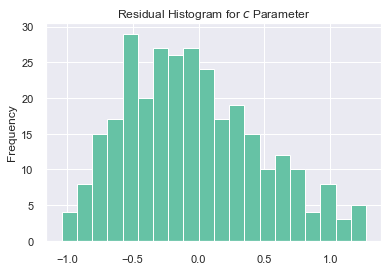

In [226]:
fig, ax = plt.subplots(figsize=(6, 4))
resids = y_test - tuned_fit.predict(X_test)
pd.Series(resids.T[3], name="residuals").plot.hist(bins=20, ax=ax, title="Residual Histogram for $c$ Parameter")

fig.savefig("images/MLPR_residual_c.svg", dpi=300)

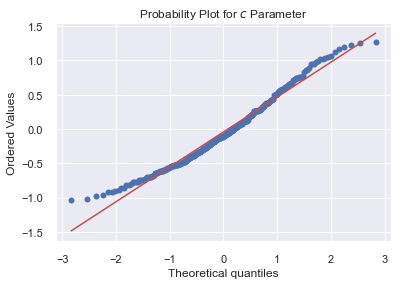

In [227]:
fig, ax = plt.subplots(figsize=(6, 4))
_ = stats.probplot(resids.T[3], plot=ax)

ax.set(title = 'Probability Plot for $c$ Parameter')

fig.savefig("images/MLPR_probability_c.svg", dpi=300)

In [31]:
y = resids.T[3]
p = []
s = []
for i in range(50):
    x = stats.norm.rvs(size=len(y), scale = np.std(y))
    p.append(ks_2samp(x,y).pvalue)
    s.append(ks_2samp(x,y).statistic)
    
np.mean(s), np.mean(p)

(0.09566666666666666, 0.23737868235633425)

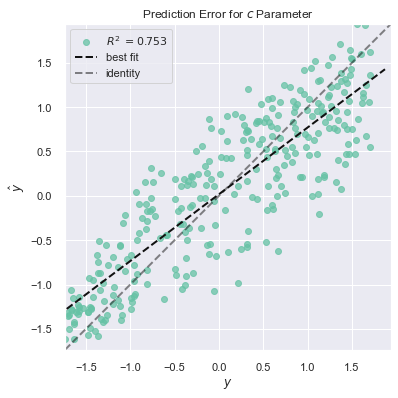

In [228]:
tuned_MLPR = MLPRegressor(random_state=1,
                     activation = 'tanh',
                     alpha = 0.6,
                     hidden_layer_sizes = (60, 50),
                     learning_rate = 'constant',
                     max_iter = 1000,
                     solver = 'adam'
                    )

fig, ax = plt.subplots(figsize=(6, 6))
pev = PredictionError(tuned_MLPR, title = 'Prediction Error for $c$ Parameter')
pev.fit(X_train, y_train.T[3])
pev.score(X_test, y_test.T[3])
pev.show()

fig.savefig("images/MLPR_prediction_c.svg", dpi=300)

r

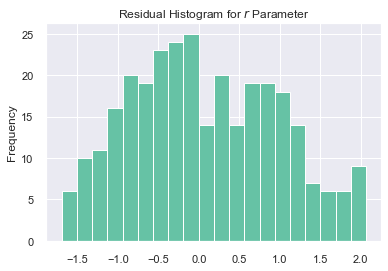

In [229]:
tuned_MLPR = MLPRegressor(random_state=1,
                     activation = 'tanh',
                     alpha = 0.6,
                     hidden_layer_sizes = (60, 50),
                     learning_rate = 'constant',
                     max_iter = 1000,
                     solver = 'adam'
                    )

fig, ax = plt.subplots(figsize=(6, 4))
resids = y_test - tuned_fit.predict(X_test)
pd.Series(resids.T[4], name="residuals").plot.hist(bins=20, ax=ax, title="Residual Histogram for $r$ Parameter")

fig.savefig("images/MLPR_residual_r.svg", dpi=300)

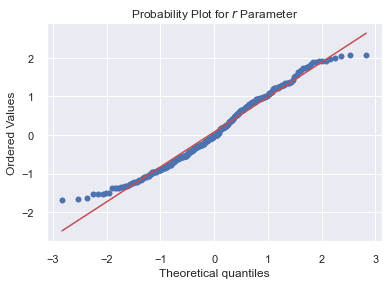

In [230]:
fig, ax = plt.subplots(figsize=(6, 4))
_ = stats.probplot(resids.T[4], plot=ax)

ax.set(title='Probability Plot for $r$ Parameter')

fig.savefig("images/MLPR_probability_r.svg", dpi=300)

In [32]:
y = resids.T[4]
p = []
s = []
for i in range(50):
    x = stats.norm.rvs(size=len(y), scale = np.std(y))
    p.append(ks_2samp(x,y).pvalue)
    s.append(ks_2samp(x,y).statistic)
    
np.mean(s), np.mean(p)

(0.07893333333333334, 0.37074334955573773)

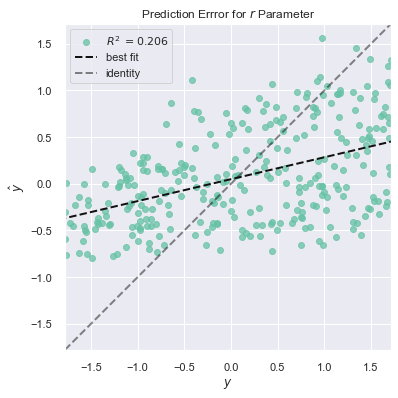

In [231]:
tuned_MLPR = MLPRegressor(random_state=1,
                     activation = 'tanh',
                     alpha = 0.6,
                     hidden_layer_sizes = (60, 50),
                     learning_rate = 'constant',
                     max_iter = 1000,
                     solver = 'adam'
                    )

fig, ax = plt.subplots(figsize=(6, 6))
pev = PredictionError(tuned_MLPR, title = 'Prediction Errror for $r$ Parameter')
pev.fit(X_train, y_train.T[4])
pev.score(X_test, y_test.T[4])
pev.show()

fig.savefig("images/MLPR_prediction_r.svg", dpi=300)

### Plot na placa

In [308]:
y_predictions = std_y.inverse_transform(regr.predict(X_test))
y_real = std_y.inverse_transform(y_test)

In [309]:
predictions = np.hstack((y_real, y_predictions))

In [311]:
predictions[0]

array([1.47395995e-01, 6.25796555e-02, 1.29585764e+02, 7.05867171e-02,
       6.33129164e-01, 1.57790912e-01, 6.29611951e-02, 1.10877395e+02,
       6.83142574e-02, 8.06592569e-01])

In [306]:
def plot_pred(dam_to_plot):
    dam_pred = predictions[dam_to_plot, :5]
    dam_real = predictions[dam_to_plot, 5:]
    plot_damage(dam_pred, color = 'red')
    plot_damage(dam_real, color = 'blue')
    plt.legend(['Plate','Predicted', '','Real'], loc = 'lower right')
    plt.title('')
    plt.yticks()
    plt.xticks()
    return None

dams = iter(np.arange(1, 300, 1))

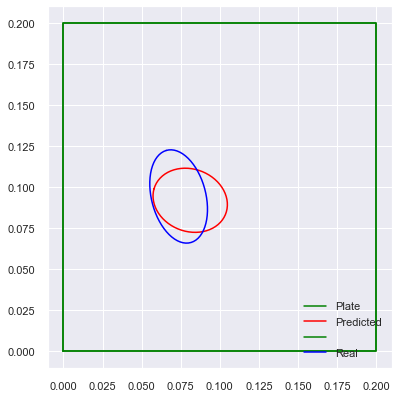

In [307]:
plot_pred(next(dams))

plt.savefig('dano9.svg', dpi = 200)

In [151]:
dams_to_plot = 7
dam_pred = predictions[:dams_to_plot, :5]
dam_real = predictions[:dams_to_plot, 5:]

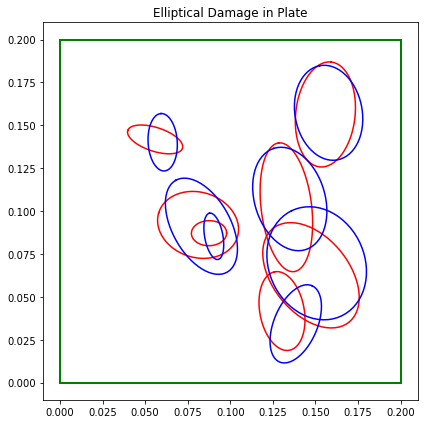

In [152]:
for i in dam_pred:
    plot_damage(i, color = 'red')
for i in dam_real:
    plot_damage(i, color = 'blue')